In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic/train.csv')

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
df.groupby('Embarked').count()['PassengerId']

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [12]:
embarked = df.groupby('Embarked').count()['PassengerId']

In [17]:
embarked[embarked == embarked.max()].index[0]

'S'

In [18]:
embarked_max = embarked[embarked == embarked.max()].index[0]

In [20]:
df.loc[df['Embarked'].isnull(), 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [21]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max

In [23]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
cabine_notna = df.loc[df['Cabin'].notna(), 'Cabin']

In [39]:
df['Age'].median()

28.0

In [42]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [48]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [49]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}

In [51]:
df.replace({'Title':mapping}, inplace=True)

In [54]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

In [58]:
df.groupby('Title')['Age'].median()

Title
Dr          46.5
Master       3.5
Miss        21.5
Mr          30.0
Mrs         35.0
Officer     56.0
Rev         46.5
RoyaltyF    40.5
RoyaltyM    40.0
Name: Age, dtype: float64

In [59]:
age_med = df.groupby('Title')['Age'].median()

In [62]:
for title, age in age_med.iteritems():
    filter_title = df['Title'] == title
    filter_age = df['Age'].isnull()
    df.loc[filter_age & filter_title, 'Age'] = age

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [64]:
df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


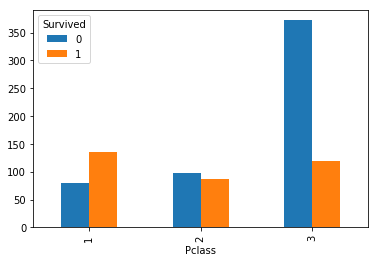

In [67]:
surv_pclass = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')
surv_pclass.plot(kind='bar')

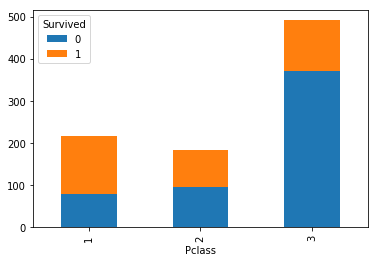

In [69]:
surv_pclass.plot(kind='bar', stacked=True)

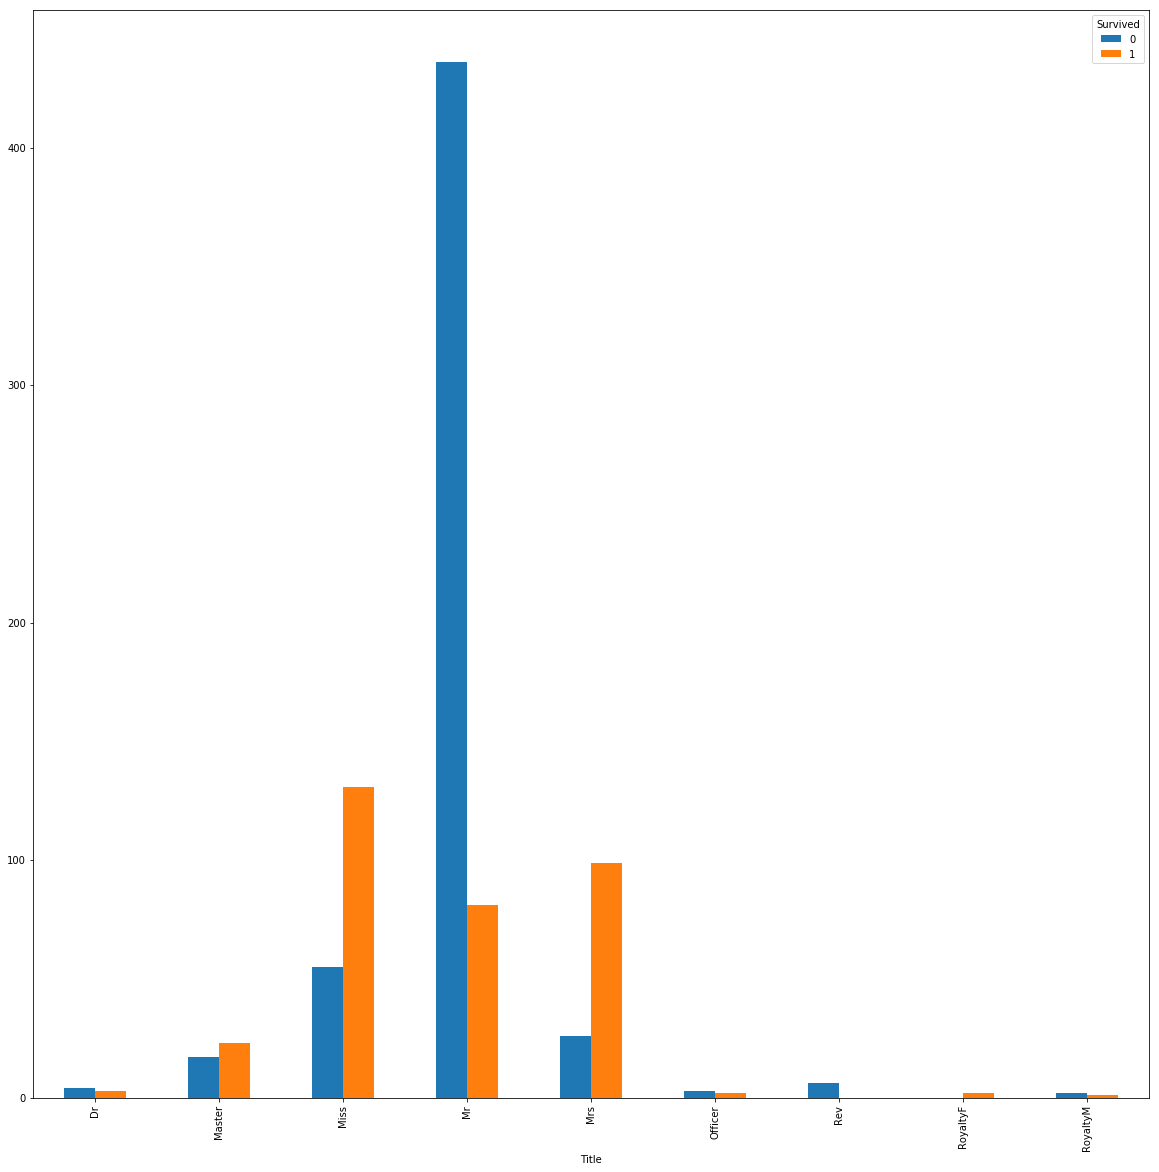

In [68]:
surv_title = df.pivot_table(values='PassengerId', index='Title', columns='Survived', aggfunc='count')
surv_title.plot(kind='bar', figsize=(20, 20))